<a href="https://colab.research.google.com/github/MisGall10/Practica_22_Misael_Gallardo/blob/main/Practica22MAGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Gallardo Cadillo Misael Adrian
*   Matrícula: 255859

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

-`Sales`: ventas del producto (variable dependiente).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [ ]:
#Cargamos las biblitecas a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#Cargamos el archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/Programacion/Unidad03/advertising.csv')
#Primeras filas del dataframe
print(df.head())
#Descripción estadística de las variables
print(df.describe())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

Podemos notar que la relacion entre TV vs Sales es la que mas lineal tiende a comporse, o al menos mas a difererncia de las variables Radio y Newspapper vs la variable dependiente Sales.

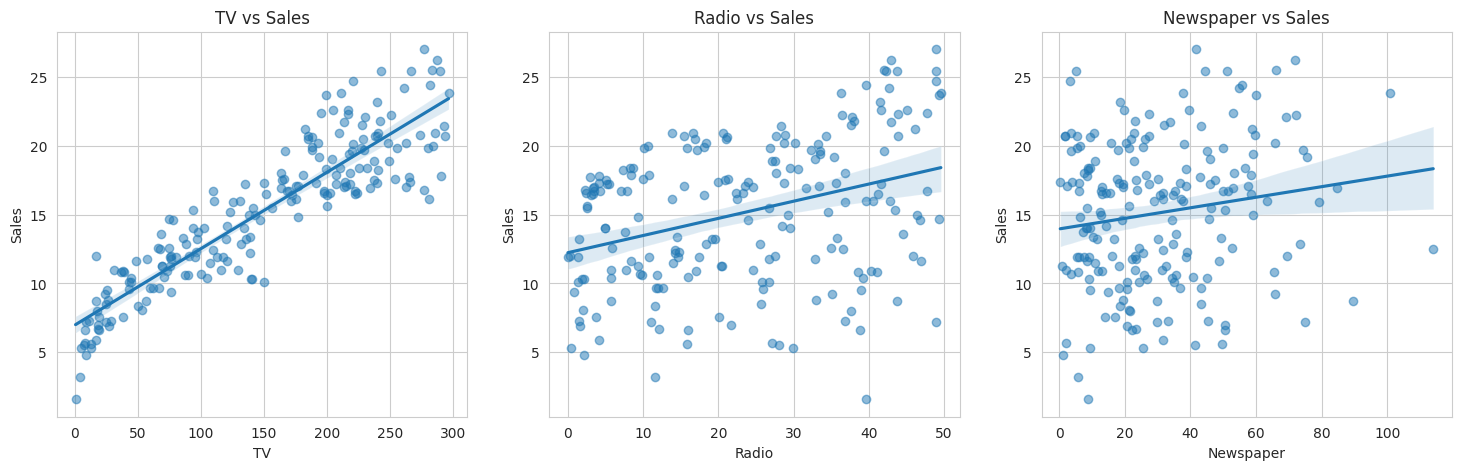

In [ ]:
#Creamos los graficos de dispersion de las variable independientes y Sales.
sns.set_style('whitegrid')
variables = ['TV', 'Radio', 'Newspaper']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(variables):
    if col in df.columns:
        sns.regplot(x=df[col], y=df['Sales'], ax=axes[i], scatter_kws={'alpha': 0.5})
        axes[i].set_title(f'{col} vs Sales')
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

Las variable TV y Sales son la que mas correlacion tienen segun la correlacion, que coincide con la grafica de dispersion del ejercicio pasado, lo que explica que al comportarse su relacion de manera lineal, lo vuelve a la par una variable muy correlacionable a la otra.

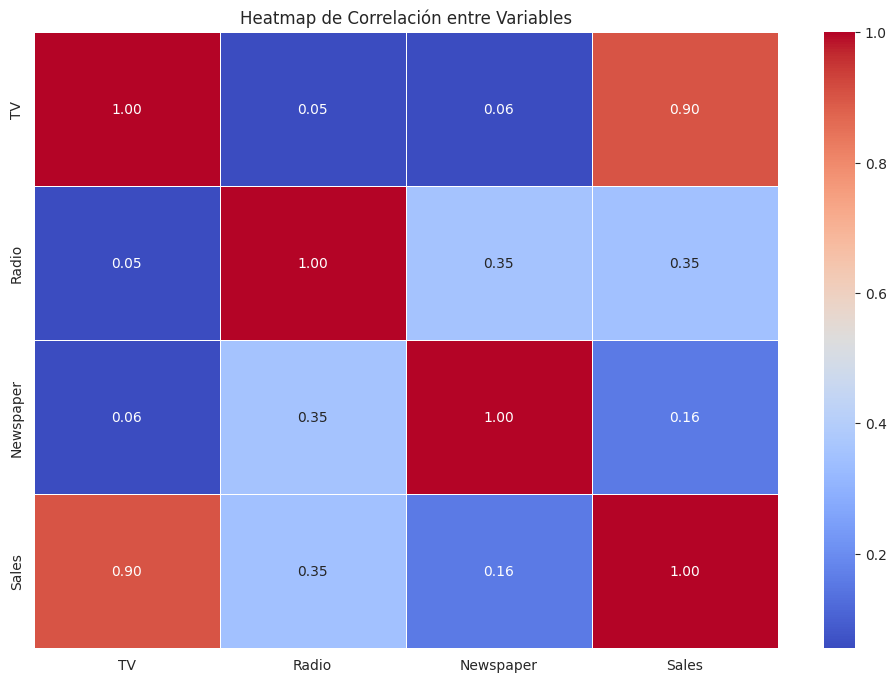

In [ ]:
# Correlación y heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Heatmap de Correlación entre Variables')
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?


Análisis de Multicolinealidad: 

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


<ipython-input-6-f30563ccd144>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


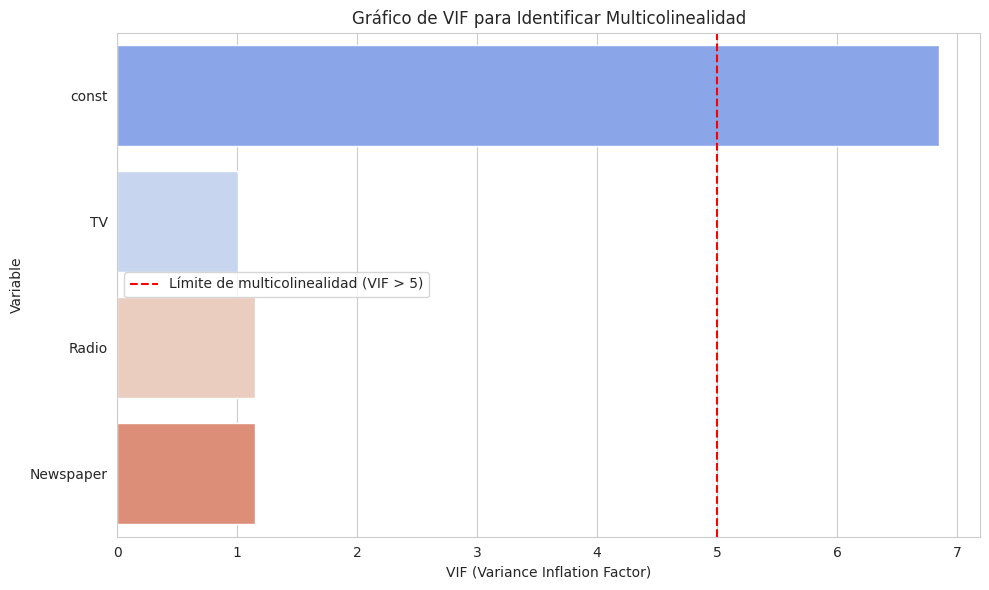

In [ ]:
#Multicolinealidad
#Calculamos el VIF para cada prefictor
X = add_constant(df.drop(columns=['Sales'])) # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('\nAnálisis de Multicolinealidad: \n')
print(vif_data)
#Creamos un diagrama de barras para mostrar el VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

Significa que tanto peso tiene la variable independiente en cuanto a la variable dependiente, en este caso, que la variable TV influye mas en Sales.

In [ ]:
# Entrenamiento del Modelo (Todas las Variables Independientes)
# Definimos las variables independientes y las dependientes
X = df.drop(columns='Sales')  # Características
y = df['Sales']  # Variable dependiente (precio)
#Aplicamos el modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)
coefficients = model.coef_
intercept = model.intercept_
#Imprimimos el intercepto y los coeficientes en terminos de Sales
print(f'\nCoeficientes estimados (En terminos de Sales): {coefficients}')
print(f'Término independiente estimado (Intercepto): {intercept}')
print('\n')
equation = f'Sales = {intercept:.4f}'
for i, coef in enumerate(coefficients):
  equation += f' + ({coef:.4f}*{X.columns[i]})'
print(equation)


Coeficientes estimados (En terminos de Sales): [4.66270025 1.58465027 0.00729187]
Término independiente estimado (Intercepto): 15.130500000000001


Sales = 15.1305 + (4.6627*TV) + (1.5847*Radio) + (0.0073*Newspaper)


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

No se distribuyen de manera normal, mas bien tienen a tener un cierto sesgo a la izquierda que puede ser prodcuto de outliers en el limite inferior.

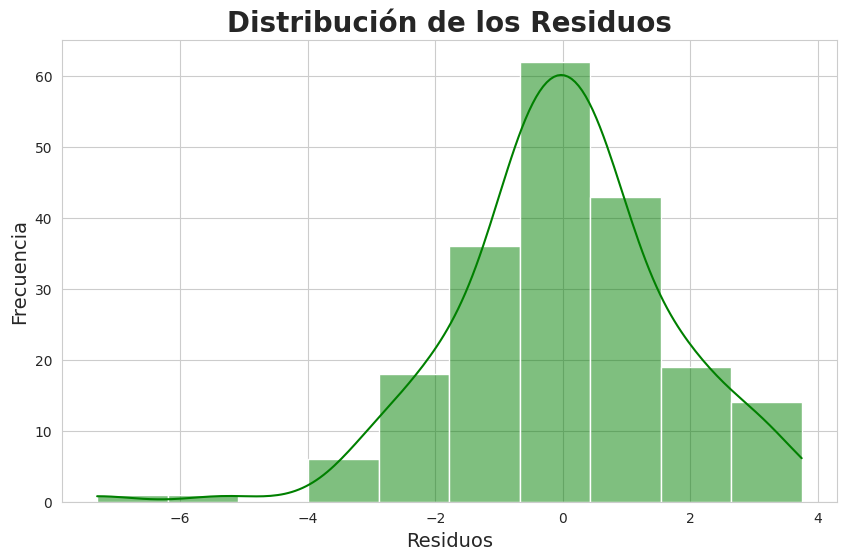

In [ ]:
#Hacemos una columna con los valores calculados por el modelo
y_pred_ML = model.predict(X_scaled)
df['y_pred_ML'] = y_pred_ML
#Hacemos una columna con los residuos
df['residuos'] = df['Sales'] - df['y_pred_ML']
#Graficamos un histograma con KDE de los residuos.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = 'residuos', bins=10, kde=True, color='green')
plt.xlabel('Residuos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de los Residuos', fontsize=20, fontweight='bold')
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

Los datos parecen que estan distribuidos aleatorieamente en una linea horizantal, lo que NO indica Heterocedasticidad.

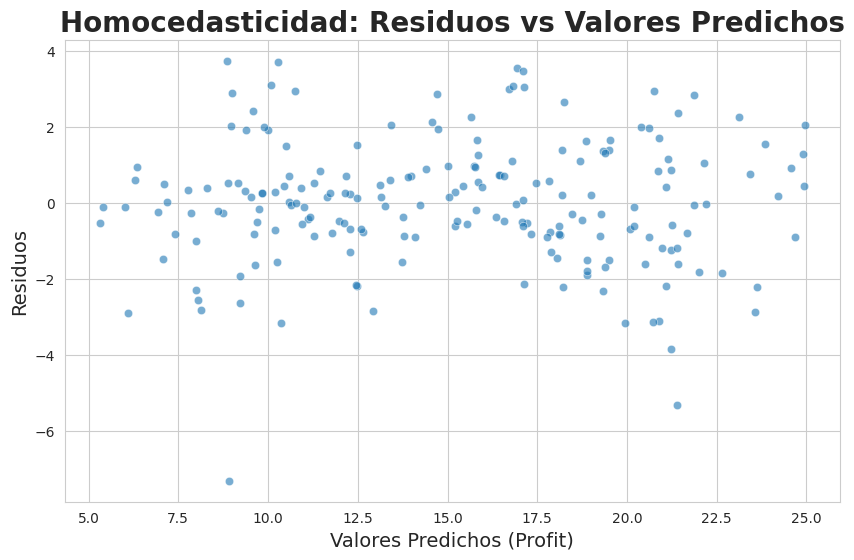

In [ ]:
# Homocedasticidad
# Gráfico de residuos vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['y_pred_ML'], y=df['residuos'], alpha=0.6)
plt.xlabel('Valores Predichos (Profit)', fontsize=14)
plt.ylabel('Residuos', fontsize=14)
plt.title('Homocedasticidad: Residuos vs Valores Predichos', fontsize=20, fontweight='bold')
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:

  a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal

  Si los puntos tiendene a seguir la diagonal, salvo unos cuantos puntos al inicio lo cual nos puede indicar una cola pesada.
  
  b) Desviaciones sistemáticas indican asimetría o colas pesadas.

  Notamos que los datos tienen tienen una cola pesada, lo que inidica que unos cuantos valores inferiores no siguen la distribucion normal, lo que a su vez no indicaria que tiene una kurtosis alta.

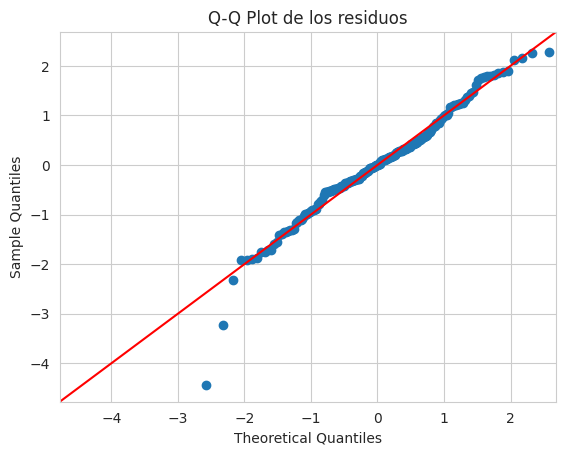

In [ ]:
import statsmodels.api as sm
#Creamos un grafico de Q-Q Plot:
sm.qqplot(df['residuos'], line='45', fit=True)
plt.title('Q-Q Plot de los residuos')
plt.grid(True)
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas:

    a) MSE (error cuadrático medio)

    b) RMSE (raíz del error cuadrático medio)

    c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

Nos dice que tomando en cuenta el RMSE, los datos del modelo se equivoca 1.64 unidades al predecir la variable Sales, en base a los datos reales. El valor de R^2 nos dice que el modelo explica el 90.26% de la variabilidad de los datos, lo que nos podria decir que es un buen modelo para esta relacion entre datos puesto que tiene un muy alto rendimiento.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 13. Calcular las métricas del modelo
mse = mean_squared_error(y, y_pred_ML)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y, y_pred_ML)  # Error absoluto medio
r2 = r2_score(y, y_pred_ML)  # Coeficiente de determinación R^2

# 14. Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")


Error Cuadrático Medio (MSE): 2.7060
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Error Absoluto Medio (MAE): 1.2364
Coeficiente de Determinación (R²): 0.9026


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué información puedes obtener de esta gráfica?

Se ve que los datos tienden a seguir esa relacion lineal entre ellos, tambien podemos notar que los puntos estan distribuidos aleatoriamente alrededor de la lina roja, lo que nos dice nos podria decir que el modelo es equilibrado y no esta sesgado.

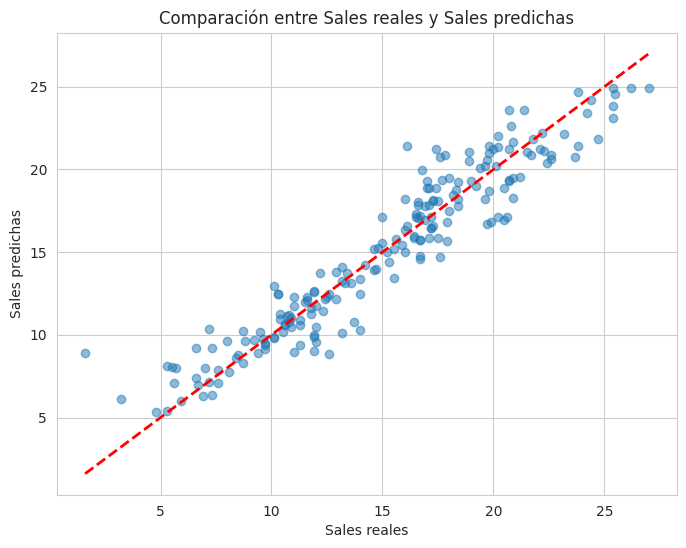

In [ ]:
#Visualización de las Predicciones
plt.figure(figsize=(8, 6))
plt.scatter(df["Sales"], df["y_pred_ML"], alpha=0.5)
plt.plot([df["Sales"].min(), df["Sales"].max()], [df["Sales"].min(), df["Sales"].max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Sales reales")
plt.ylabel("Sales predichas")
plt.title("Comparación entre Sales reales y Sales predichas")
plt.grid(True)
plt.show()

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.
La variable Newspaper tiene un p-value de 0.954 lo que indica quqe no es estadisticamente significativa
 - ¿Qué variables tienen p-value menores a 0.05?
TV y Radio son variables significativas en el modelo porque tienen p-values muy bajos, lo cual significa que tiuenen relacion con Sales
 - ¿Cuál es la conclusión sobre esas variables?
Las varibles antes mencionadas son significativas en el modelo, lo cual nos puede sugerir que la variable de newspaper puede ser eliminada para ver como se comporta el modelo.

In [ ]:
#P-values
import statsmodels.api as sm

# Agregar una constante al conjunto de datos X_scaled
X_scaled_with_constant = sm.add_constant(X_scaled)

# Ajustar el modelo de regresión lineal utilizando statsmodels
model_sm = sm.OLS(y, X_scaled_with_constant).fit()

# Imprimir el resumen del modelo
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           8.13e-99
Time:                        04:10:45   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos **que la parte 4**.
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

En este caso no detectamos variables que se considereen que tengan multicolinealidad, ya que todas tienen menos de 1.3

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

---

In [ ]:
#Cargamos las biblitecas a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#Cargamos el archivo
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/Programacion/Unidad03/advertising.csv')
#Eliminamos la variable de newspaper
df = df.drop(columns=['Newspaper'])
# Entrenamiento del Modelo (Todas las Variables Independientes)
# Definimos las variables independientes y las dependientes
X = df.drop(columns='Sales')  # Características
y = df['Sales']  # Variable dependiente (precio)
#Aplicamos el modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)
coefficients = model.coef_
intercept = model.intercept_
#Imprimimos el intercepto y los coeficientes en terminos de Sales
print(f'\nCoeficientes estimados (En terminos de Sales): {coefficients}')
print(f'Término independiente estimado (Intercepto): {intercept}')
print('\n')
equation = f'Sales = {intercept:.4f}'
for i, coef in enumerate(coefficients):
  equation += f' + ({coef:.4f}*{X.columns[i]})'
print(equation)


Coeficientes estimados (En terminos de Sales): [4.66297261 1.58721742]
Término independiente estimado (Intercepto): 15.130500000000001


Sales = 15.1305 + (4.6630*TV) + (1.5872*Radio)


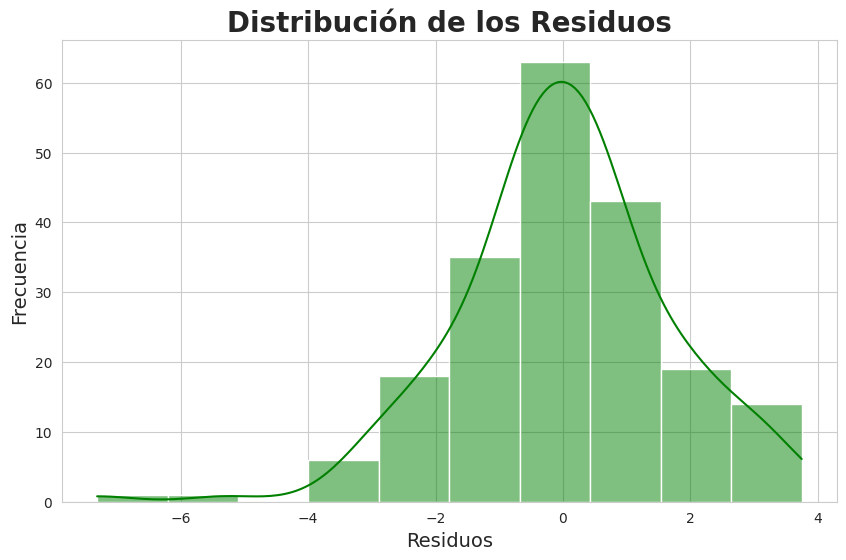

In [ ]:
#Hacemos una columna con los valores calculados por el modelo
y_pred_ML = model.predict(X_scaled)
df['y_pred_ML'] = y_pred_ML
#Hacemos una columna con los residuos
df['residuos'] = df['Sales'] - df['y_pred_ML']
#Graficamos un histograma con KDE de los residuos.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = 'residuos', bins=10, kde=True, color='green')
plt.xlabel('Residuos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de los Residuos', fontsize=20, fontweight='bold')
plt.show()

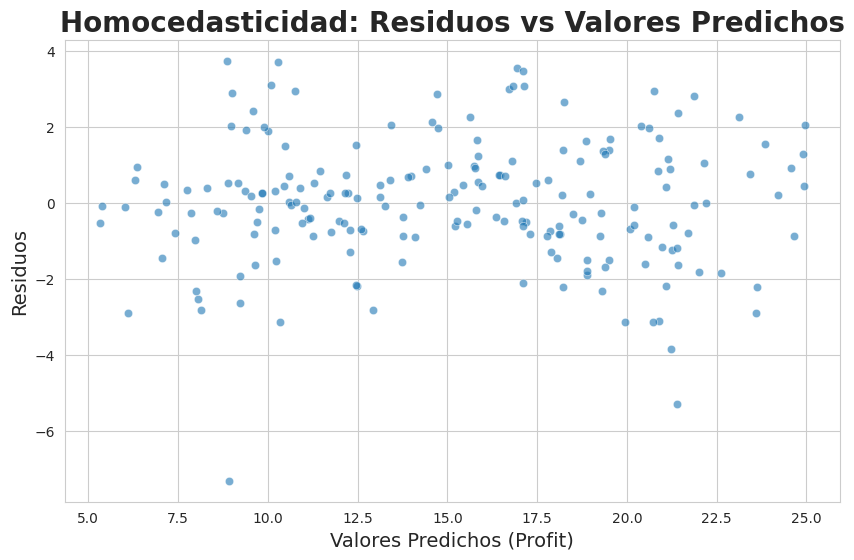

In [ ]:
# Homocedasticidad
# Gráfico de residuos vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['y_pred_ML'], y=df['residuos'], alpha=0.6)
plt.xlabel('Valores Predichos (Profit)', fontsize=14)
plt.ylabel('Residuos', fontsize=14)
plt.title('Homocedasticidad: Residuos vs Valores Predichos', fontsize=20, fontweight='bold')
plt.show()

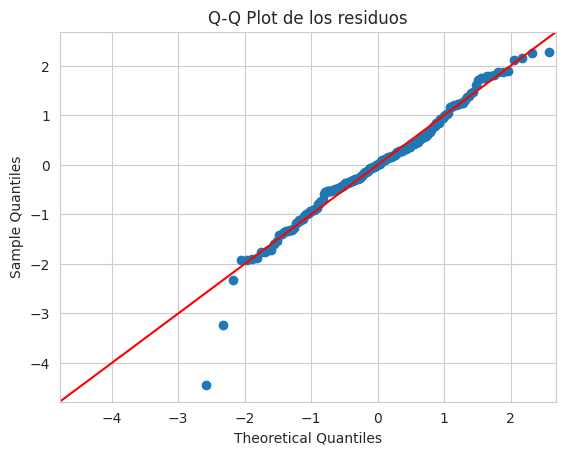

In [ ]:
import statsmodels.api as sm
#Creamos un grafico de Q-Q Plot:
sm.qqplot(df['residuos'], line='45', fit=True)
plt.title('Q-Q Plot de los residuos')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 13. Calcular las métricas del modelo
mse = mean_squared_error(y, y_pred_ML)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y, y_pred_ML)  # Error absoluto medio
r2 = r2_score(y, y_pred_ML)  # Coeficiente de determinación R^2

# 14. Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")


Error Cuadrático Medio (MSE): 2.7061
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Error Absoluto Medio (MAE): 1.2368
Coeficiente de Determinación (R²): 0.9026


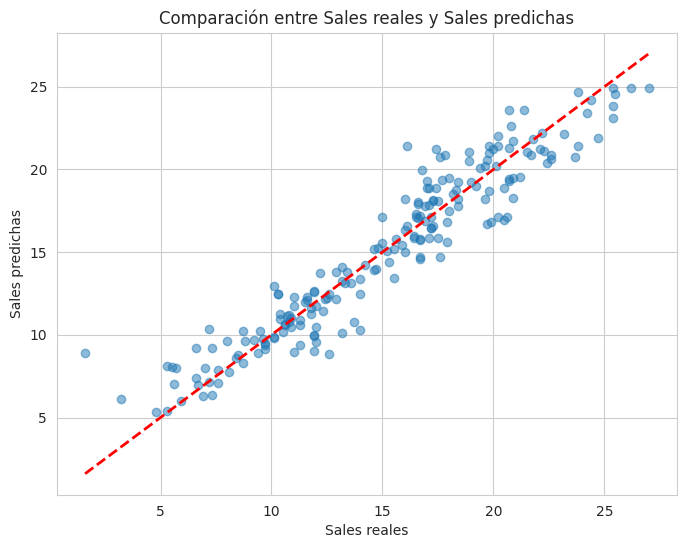

In [ ]:
#Visualización de las Predicciones
plt.figure(figsize=(8, 6))
plt.scatter(df["Sales"], df["y_pred_ML"], alpha=0.5)
plt.plot([df["Sales"].min(), df["Sales"].max()], [df["Sales"].min(), df["Sales"].max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Sales reales")
plt.ylabel("Sales predichas")
plt.title("Comparación entre Sales reales y Sales predichas")
plt.grid(True)
plt.show()

In [ ]:
#P-values
import statsmodels.api as sm

# Agregar una constante al conjunto de datos X_scaled
X_scaled_with_constant = sm.add_constant(X_scaled)

# Ajustar el modelo de regresión lineal utilizando statsmodels
model_sm = sm.OLS(y, X_scaled_with_constant).fit()

# Imprimir el resumen del modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          2.39e-100
Time:                        04:17:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    129.098      0.0

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?

Basicamente los dos modelos son muy similares, pero ligeramente lo es mejor el segundo modelo (el que no incluye la variable de Newspaper) ya que el Adj R2 es marginablemente mayor, asi como el F-Statistic, lo que indica que el modelo es mas significativo.

El atributo que mejor infuencia tiene en las ventas ('Sales') es la vairable TV, teniendo un valor de correlacion de 0.90 lo indica una fuerte relacio entre ellas.